array('d', [1.0, 3.0]) array('d', [1.0, 3.0])


/home/patricio-linux/.local/lib/python3.10/site-packages/shapely/geometry/linestring.py:244: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  m = len(ob)
/home/patricio-linux/.local/lib/python3.10/site-packages/shapely/geometry/linestring.py:265: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  n = len(_coords(ob[0]))
/home/patricio-linux/.local/lib/python3.10/site-packages/shapely/geometry/linestring.py:283: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  coords = _coords(ob[i])


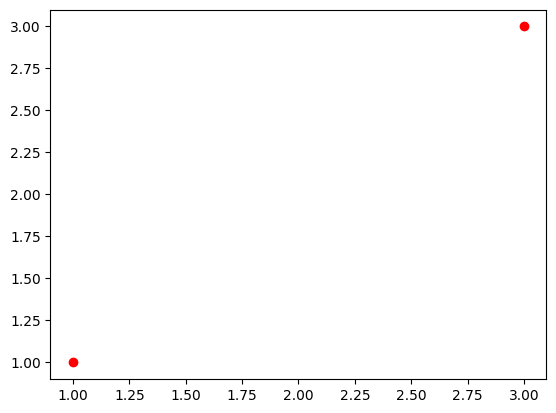

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# Definir las coordenadas de dos líneas que se intersectan
X1 = [1, 2, 3, 4]
Y1 = [1, 2, 3, 4]
X2 = [1, 3, 3, 3]
Y2 = [1, 2, 3, 0]

# Crear las líneas utilizando Shapely
first_line = LineString(np.column_stack((X1, Y1)))
second_line = LineString(np.column_stack((X2, Y2)))

# Encontrar la intersección
intersection = first_line.intersection(second_line)

if intersection.geom_type == 'MultiPoint':
    plt.plot(*LineString(intersection).xy, 'ro')
    print(*LineString(intersection).xy)


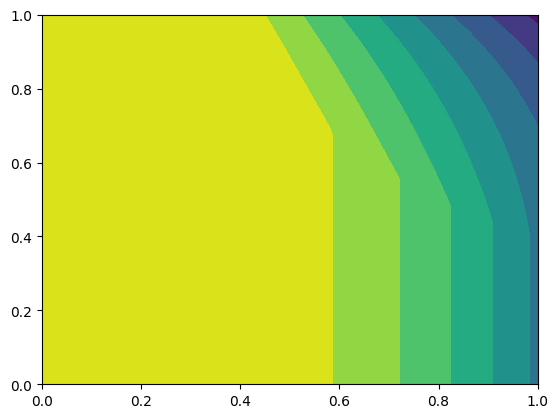

In [17]:
import sympy
from sympy import Derivative, simplify, Piecewise, Min, Max, integrate, pycode, parse_expr, solve
import scipy
import numpy as np
import matplotlib.pyplot as plt
import json
import random
import multiprocessing as mp
from shapely.geometry import LineString
import sympy.plotting



# Eequilibrio buscado
b2_v = 0.4

y2, p2, q2, b2, r = sympy.symbols('y2 p2 q2 b2 r', real=True, positive=True)
t2 = sympy.symbols('t2', positive=True)

g2 = 3*(1-t2)*(y2-1)**2 + 3*t2*y2**2

## p*q > b barra 
vf2_1 = integrate(Min(y2/q2,1)*g2,(y2,0,1))

## p*q < b barra y p >= b barra
vf2_2 = integrate(Min(p2*y2/b2,1)*g2,(y2,0,1))

## p*q < b barra y p < b barra
vf2_3 = integrate(p2*y2/b2*g2,(y2,0,1))

# theta gorro
## p*q > b barra 
tgorro2_1n = solve(vf2_1 - p2,t2)[0]

## p*q < b barra y p >= b barra
tgorro2_2n = solve(vf2_2 - p2,t2)[0]

## p*q < b barra y p < b barra
tgorro2_3n = solve(vf2_3 - p2,t2)[0]

d2 = Piecewise((1 - tgorro2_1n, p2*q2 > b2), (1-tgorro2_2n, (p2*q2<= b2) & (p2 >= b2)), (1-tgorro2_3n, True))

p_lin = np.linspace(0,1,100)
q_lin = np.linspace(0,1,100)
p_lin,q_lin = np.meshgrid(p_lin,q_lin)

d2_mesh = np.zeros((100,100))
for x in range(100):
    for y in range(100):
        d2_mesh[x,y] = d2.subs([(p2,p_lin[x,y]),(q2,q_lin[x,y]),(b2,b2_v)])

fig, ax = plt.subplots()

ax.contourf(p_lin,q_lin,d2_mesh, 10)
plt.show()

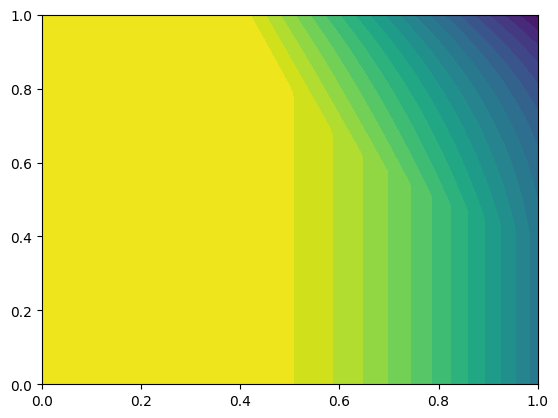

In [20]:

fig, ax = plt.subplots()
ax.contourf(p_lin,q_lin,d2_mesh, 20)
plt.show()

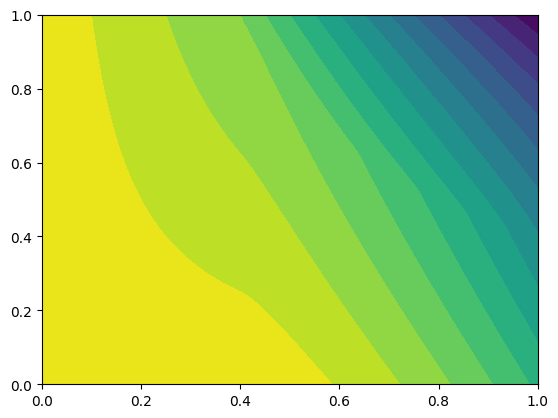

In [21]:
p_lin = np.linspace(0,1,100)
q_lin = np.linspace(0,1,100)
p_lin,q_lin = np.meshgrid(p_lin,q_lin)

res_mesh = np.zeros((100,100))
for x in range(100):
    for y in range(100):
        res_mesh[x,y] = d2.subs([(p2,p_lin[x,y]),(q2,q_lin[x,y]),(b2,b2_v)]) - p_lin[x,y]*q_lin[x,y]

fig, ax = plt.subplots()

ax.contourf(p_lin,q_lin,res_mesh, 20)
plt.show()

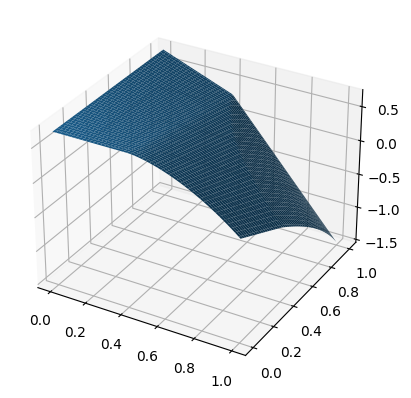

In [29]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(p_lin,q_lin,res_mesh)
plt.show()

In [6]:
import sympy
from sympy import Derivative, simplify, Piecewise, Min, Max, integrate, pycode, parse_expr, solve
import scipy
import numpy as np
import matplotlib.pyplot as plt
import json
import random
import multiprocessing as mp
from shapely.geometry import LineString



# Eequilibrio buscado
b2_v = 0.4

y2, p2, q2, b2, r = sympy.symbols('y2 p2 q2 b2 r', real=True, positive=True)
t2 = sympy.symbols('t2', positive=True)

g2 = 3*(1-t2)*(y2-1)**2 + 3*t2*y2**2

## p*q > b barra 
vf2_1 = integrate(Min(y2/q2,1)*g2,(y2,0,1))

## p*q < b barra y p >= b barra
vf2_2 = integrate(Min(p2*y2/b2,1)*g2,(y2,0,1))

## p*q < b barra y p < b barra
vf2_3 = integrate(p2*y2/b2*g2,(y2,0,1))



# theta gorro
## p*q > b barra 
tgorro2_1 = solve(vf2_1 - p2/(p2+r),t2)[0]
tgorro2_1n = solve(vf2_1 - p2,t2)[0]

## p*q < b barra y p >= b barra
tgorro2_2 = solve(vf2_2 - p2/(p2+r),t2)[0]
tgorro2_2n = solve(vf2_2 - p2,t2)[0]

## p*q < b barra y p < b barra
tgorro2_3 = solve(vf2_3 - p2/(p2+r),t2)[0]
tgorro2_3n = solve(vf2_3 - p2,t2)[0]


d2 = Piecewise((1 - r/(p2 +r)*tgorro2_2, (p2 + r <= 1)), (1-tgorro2_2n,True))
d2 = Max(0,Min(1,d2))
d3 = Piecewise((1/(p2+r)*tgorro2_2, (p2 + r <= 1)), (0, True)) # Ya está dividido en r
d3 = Max(0,Min(1,d3))
# print(d2)
# sympy.plot(d2.subs([(r,0.2),(b2,b2_v),(q2,0.4)]),(p2,0,1))

u2 = integrate(Max(0,Min(1,p2*q2/b2)*y2- q2)*g2.subs(t2,1),(y2,0,1))
u3 = Min(q2,d3)*(r - integrate((1-Min(1,p2/b2*y2))*9*y2**8,(y2,0,1)))

deru3_1 = Derivative(d3*(r - integrate((1-Min(1,p2/b2*y2))*9*y2**8,(y2,0,1))),r)
solve(deru3_1.subs([(b2,b2_v),(p2,0.5)]).doit(),r)

NotImplementedError: multiple generators [r, Heaviside(-499199999999999*r/(-896000000000000*r**2 - 896000000000000*r - 224000000000000) + 1 + 344/(-560*r**2 - 560*r - 140)), Heaviside(Min(1, 499199999999999*r/(-896000000000000*r**2 - 896000000000000*r - 224000000000000) - 344/(-560*r**2 - 560*r - 140))), Max(0, Min(1, 499199999999999*r/(-896000000000000*r**2 - 896000000000000*r - 224000000000000) - 344/(-560*r**2 - 560*r - 140)))]
No algorithms are implemented to solve equation (r - 131072/9765625)*(-5*(499199999999999*r/1000000000000000 - 344/625)/(8*(-14*r/25 - 7/25)*(r + 1/2)**2) + 39/(125*(-14*r/25 - 7/25)*(r + 1/2)) + 125*(499199999999999*r/1000000000000000 - 344/625)/(112*(-r - 1/2)**2*(r + 1/2)))*Heaviside(1 - 5*(499199999999999*r/1000000000000000 - 344/625)/(8*(-14*r/25 - 7/25)*(r + 1/2)))*Heaviside(Min(1, 5*(499199999999999*r/1000000000000000 - 344/625)/(8*(-14*r/25 - 7/25)*(r + 1/2)))) + Max(0, Min(1, 5*(499199999999999*r/1000000000000000 - 344/625)/(8*(-14*r/25 - 7/25)*(r + 1/2))))

In [1]:
import sympy
from sympy import Derivative, simplify, Piecewise, Min, Max, integrate, pycode, parse_expr, solve
import scipy
import numpy as np
import matplotlib.pyplot as plt
import json
import random
import multiprocessing as mp
from shapely.geometry import LineString



# Eequilibrio buscado
b2_v = 0.55

y2, p2, q2, b2, r = sympy.symbols('y2 p2 q2 b2 r', real=True, positive=True)
t2 = sympy.symbols('t2', positive=True)

g2 = 3*(1-t2)*(y2-1)**2 + 3*t2*y2**2

## p*q > b barra 
vf2_1 = integrate(Min(y2/q2,1)*g2,(y2,0,1))

## p*q < b barra y p >= b barra
vf2_2 = integrate(Min(p2*y2/b2,1)*g2,(y2,0,1))

## p*q < b barra y p < b barra
vf2_3 = integrate(p2*y2/b2*g2,(y2,0,1))



# theta gorro
## p*q > b barra 
tgorro2_1 = solve(vf2_1 - p2/(p2+r),t2)[0]
tgorro2_1n = solve(vf2_1 - p2,t2)[0]

## p*q < b barra y p >= b barra
tgorro2_2 = solve(vf2_2 - p2/(p2+r),t2)[0]
tgorro2_2n = solve(vf2_2 - p2,t2)[0]

## p*q < b barra y p < b barra
tgorro2_3 = solve(vf2_3 - p2/(p2+r),t2)[0]
tgorro2_3n = solve(vf2_3 - p2,t2)[0]


d2 = Piecewise((1 - r/(p2 +r)*tgorro2_2, (p2 + r <= 1)), (1-tgorro2_2n,True))
d2 = Max(0,Min(1,d2))
# Esta funcion ya está dividida en r
d3 = Piecewise((1/(p2+r)*tgorro2_2, (p2 + r <= 1)), (0, True)) # Ya está dividido en r
d3 = Max(0,Min(1,d3))
# print(d2)
# sympy.plot(d2.subs([(r,0.2),(b2,b2_v),(q2,0.4)]),(p2,0,1))

u2 = integrate(Max(0,Min(1,p2*q2/b2)*y2- q2)*3*y2**2,(y2,0,1))
u3 = Min(q2,d3)*(r - integrate((1-Min(1,p2/b2*y2)),(y2,0,1)))

In [10]:
integrate(y2,(y2,0,1))
b2_v = 0.5
p2_v = 0.6
integrate(Min(p2/b2*y2,1),(y2,0,1)).subs([(b2,b2_v),(p2,p2_v)])

0.583333333333333

In [13]:
p2_v/b2_v*integrate(3*y2**1,(y2,0,1))-1

0.800000000000000

Intersection point: [1.         1.61803399 3.61803399]


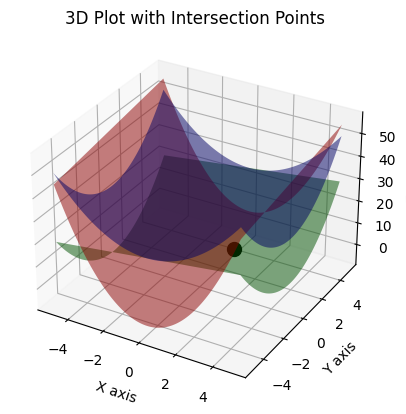

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the functions
def f(x, y):
    return x**2 + y**2

def g(x, y):
    return 2*x**2 + y

def h(x, y):
    return x + y**2

# Create a mesh grid
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Compute the function values
Z1 = f(X, Y)
Z2 = g(X, Y)
Z3 = h(X, Y)

# Plot the functions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z1, alpha=0.5, rstride=100, cstride=100, color='blue', label='f(x, y)')
ax.plot_surface(X, Y, Z2, alpha=0.5, rstride=100, cstride=100, color='red', label='g(x, y)')
ax.plot_surface(X, Y, Z3, alpha=0.5, rstride=100, cstride=100, color='green', label='h(x, y)')

# Finding and plotting intersections is complex and may require solving the system of equations numerically.
# For now, we'll highlight an example point where we assume intersection (this is illustrative).
# You would replace this with actual intersection points found using numerical methods.

from scipy.optimize import fsolve

# Define the system of equations
def equations(vars):
    x, y, z = vars
    eq1 = f(x, y) - z
    eq2 = g(x, y) - z
    eq3 = h(x, y) - z
    return [eq1, eq2, eq3]

# Initial guess for the variables
initial_guess = [1, 1, 2]

# Solve the system of equations
solution = fsolve(equations, initial_guess)
print(f"Intersection point: {solution}")

for point in intersection_points:
    ax.scatter(*solution, color='black', s=100)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Plot with Intersection Points')

plt.show()


In [9]:
import numpy as np
from mayavi import mlab
from scipy.optimize import fsolve

# Define the functions
def f(x, y):
    return x**2 + y**2

def g(x, y):
    return 2*x**2 + y

def h(x, y):
    return x + y**2

# Create a mesh grid
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Compute the function values
Z1 = f(X, Y)
Z2 = g(X, Y)
Z3 = h(X, Y)

# Plot the first function
mlab.figure(bgcolor=(1, 1, 1))
mlab.surf(X, Y, Z1, colormap='Blues', opacity=0.5)

# Plot the second function
mlab.surf(X, Y, Z2, colormap='Reds', opacity=0.5)

# Plot the third function
mlab.surf(X, Y, Z3, colormap='Greens', opacity=0.5)

# Define the system of equations to find the intersection points
def equations(vars):
    x, y, z = vars
    eq1 = f(x, y) - z
    eq2 = g(x, y) - z
    eq3 = h(x, y) - z
    return [eq1, eq2, eq3]

# Initial guess for the variables
initial_guess = [1, 1, 2]

# Solve the system of equations
solution = fsolve(equations, initial_guess)
print(f"Intersection point: {solution}")

# Extract the intersection point
x_int, y_int, z_int = solution

# Plot the intersection point
mlab.points3d(x_int, y_int, z_int, color=(0, 0, 0), scale_factor=0.3)

mlab.xlabel('X axis')
mlab.ylabel('Y axis')
mlab.zlabel('Z axis')
mlab.title('3D Plot with Intersection Points')

mlab.show()


Intersection point: [1.         1.61803399 3.61803399]


In [8]:
import numpy as np

a = [0,2,3]
b = list()

np.concatenate((a,b))

array([0., 2., 3.])